# Supervised learning
### A dot of EDA, logistic regression, random forest and gradient boosting.

#### Clement Riedel, July 2016

Welcome the ds4all.io notebook about supervised learning. Here I will demonstrate how to use logistic regression, random forest and gradient boosting to learn and predict information on a real dataset related to telecom information. This notebook aims to be a reference on how to perfrom a supervised data science study. Feel free to use part or the whole notebook for yor own study.

(If you are coming from the [ds4all.io/pipeline](http://ds4all.io/pipeline)  and are wondering why we are not working with the fraud data: it is because the dataset is private.)

*Note: This study is presented on a jupyter notebook for its convenience in the display of contents; if you are developing a project we strongly advise to switch to a text editor after the Exploratory Data Analysis.*



## Exploratory Data Analysis (EDA)

In [1]:
# Import numpy, pandas
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read the csv file and store it in a panda data frame. 
# The data is available at github.com/clemriedel/ds4all/supervised_learning
df = pd.read_csv('telecom_churn.csv')

In [3]:
# Shape of the dataset
shape(df)
print "The dataset contains {} observations and {} features.".format(shape(df)[0],shape(df)[1])

The dataset contains 3333 observations and 21 features.


In [4]:
# Info: Features names, types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [5]:
# Overview of the data first elements.
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


#### Missing values
In the info, we see that we do not have missing values (all the features have 3333 values). (If I do have missing values, I can drop columns with too many of them; keep track of how many are missing and replace them by the mean or drop them.)  We can only deal with numbers so State should be "dummified" if we want to include it in the study.

#### Dummification
Dummification works as follows: We replace the one column state by 51 columns, one for each state. The observation will have fifty 0 and one 1 for the corresponding states. Dummification works great for a small number of features. For this study: We provide the code but choose not to dummify States and drop the column.

In [6]:
len(df.State.unique())

51

In [7]:
df_states = pd.get_dummies(df['State'])
frames = [df, df_states]
df_dummy = pd.concat(frames, axis=1)
df_dummy.drop('State', axis=1, inplace=True)
shape(df_dummy) #We see in the shape that the 51 states have been added as new columns.

(3333, 71)

#### Back to our study: 
Phone number is not judged to be a predictive feature: we will drop this column. As previously explained, we also drop State. We make sure we only have numbers in our database.

In [8]:
df.drop(['State', 'Phone'], axis=1, inplace=True)
df = df.replace(['yes', 'no'], [1, 0])
df = df.replace(['True.', 'False.'], [True, False]) 
#Pandas deals with True and False as 1 and 0, but we still need to remove the dots.

#### Finally, we obtain our 'y' and the matrix of features X

In [9]:
y = df.pop('Churn?')
X = df

# Modeling

In [10]:
# Import basic modules from sklearn
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import *

#### Train / test split
Sklearn permits to split the sample into a training and testing set.The testing set is always composed of 'previously unseen' observation in my studies. I choose 70% of the data as training set and 30% as 'keep unseen for testing'.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logreg = LogisticRegression() # Instantiate the model
logreg.fit(X_train, y_train) # Fit to the training dataset.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Confusion matrix and metrics

In [14]:
# sklearn can calculate the confusion matrix
conf_mat = confusion_matrix(y_test, logreg.predict(X_test))
conf_mat

array([[843,  19],
       [112,  26]])

In [15]:
# Same thing, easier to read:
print "*** Logistic regression - confusion matrix ***"
logreg_res = pd.DataFrame(zip(logreg.predict(X_test), y_test), columns=["Predicted","Actual"])
pd.crosstab(logreg_res.Actual, logreg_res.Predicted)

*** Logistic regression - confusion matrix ***


Predicted,False,True
Actual,,
False,843,19
True,112,26


**Let's take a second here to detail how to read the confusion matrix** . We split our 3333 intial obseervations into of about 2333 to train and 1000 as unseen (the sum of the four numbers in the confusion matrix). On this 1000 observations 862 (the sum of the first line) were False: they did not lead to a churn. We correctly predict 842 while 20 where predicted as churn while they were not. (You can apply the same for the Actual True).

**There are a lot of metrics to evaluate your model:** you may know the accuracy (correct predictions divided by all the predictions, aka 'how many times your model right". We can also use recall and precision.

In [16]:
accuracy = float((conf_mat[0][0]+conf_mat[1][1])/float(np.sum(conf_mat)))
print "Accuracy = {} : on 100 predictions, we have been right {} times.".format(accuracy, np.int(accuracy*100))

Accuracy = 0.869 : on 100 predictions, we have been right 86 times.


In [17]:
# We can do the very same thing using sklearn cross validation;
# and also calculate recall and precison:
accuracy_logreg = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()
recall_logreg = cross_val_score(logreg, X, y, cv=10, scoring='recall').mean()
precision_logreg = cross_val_score(logreg, X, y, cv=10, scoring='precision').mean()

print "*** Logistic regression - Metrics ***"
print "Accuracy = {}".format(accuracy_logreg)
print "Recall = {}".format(recall_logreg)
print "Precision = {}".format(precision_logreg)

*** Logistic regression - Metrics ***
Accuracy = 0.859883835932
Recall = 0.18005952381
Precision = 0.564062971342


### Features importance

In [18]:
logit_coefs = pd.DataFrame(zip(X.columns, np.transpose(logreg.coef_).squeeze())).\
    rename(columns = {0:'Variable', 1:'Log Odds'})
    
logit_coefs['Odds Ratio'] = np.exp(logit_coefs['Log Odds'])

logit_coefs.sort_values('Odds Ratio', ascending=False)

,Variable,Log Odds,Odds Ratio
2,Int'l Plan,1.931188,6.897698
17,CustServ Calls,0.515554,1.674566
16,Intl Charge,0.066464,1.068723
14,Intl Mins,0.032280,1.032806
7,Day Charge,0.024443,1.024744
4,VMail Message,0.013353,1.013442
5,Day Mins,0.007526,1.007554
8,Eve Mins,0.003913,1.003920
11,Night Mins,0.002483,1.002486
10,Eve Charge,0.002138,1.002141


## Random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)

In [20]:
accuracy = cross_val_score(rf, X, y, cv=10, scoring='accuracy').mean()
recall = cross_val_score(rf, X, y, cv=10, scoring='recall').mean()
precision = cross_val_score(rf, X, y, cv=10, scoring='precision').mean()

print "*** Random forest - Metrics ***"
print "Accuracy {}:".format(accuracy)
print "Recall {}:".format(recall)
print "Precision {}:".format(precision)

rf_res = pd.DataFrame(zip(y_test, rf.predict(X_test)), columns=["Actual", "Predicted"])
pd.crosstab(rf_res.Predicted, rf_res.Actual)

*** Random forest - Metrics ***
Accuracy 0.946300192408:
Recall 0.685289115646:
Precision 0.936158207202:


Actual,False,True
Predicted,,
False,842,35
True,20,103


*********** Random forest - Feature importance ***********


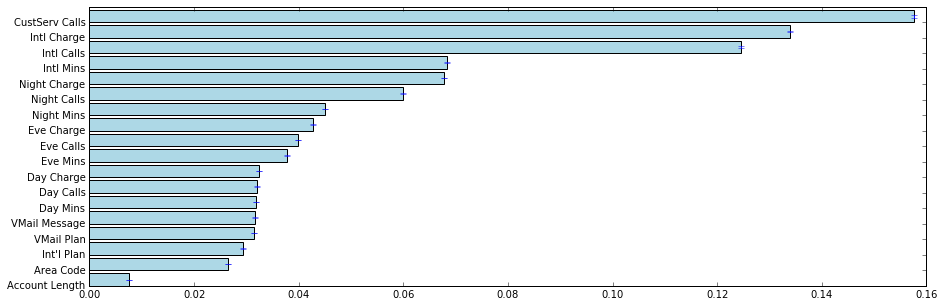

In [21]:
print "*********** Random forest - Feature importance ***********"
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)
plt.figure(figsize=(15,5))
plt.barh(range(len(indices)), importances[indices], yerr=std[indices], color='lightblue')
ticks = plt.yticks(range(len(indices)), df.columns)

In [22]:
from sklearn.grid_search import RandomizedSearchCV

rf_grid = {'max_depth': [3, None],
           'max_features' : ['auto', 'sqrt', 'log2'],
           'min_samples_split': [1, 3, 10],  
           'min_samples_leaf': [1, 3, 10],
           'bootstrap': [True, False],
           'n_estimators': [25, 40, 50],
           'random_state': [1]}

rf_opt = RandomizedSearchCV(rf, rf_grid, cv=5, n_jobs=-1, scoring='accuracy')
rf_opt.fit(X_train, y_train)
rf_opt.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 1,
 'n_estimators': 50,
 'random_state': 1}

In [23]:
accuracy_rf_opt = cross_val_score(rf_opt, X, y, cv=5, scoring='accuracy').mean()
recall_rf_opt = cross_val_score(rf_opt, X, y, cv=5, scoring='recall').mean()
precision_rf_opt = cross_val_score(rf_opt, X, y, cv=5, scoring='precision').mean()

print "*** Optimized random forest - Metrics ***"
print "Accuracy {}:".format(accuracy_rf_opt)
print "Recall {}:".format(recall_rf_opt)
print "Precision {}:".format(precision_rf_opt)

*** Optimized random forest - Metrics ***
Accuracy 0.954997726362:
Recall 0.735008591065:
Precision 0.9236928262:


## Gradient boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier().fit(X_train, y_train)

In [25]:
accuracy_gbc = cross_val_score(gbc, X, y, cv=10, scoring='accuracy').mean()
recall_gbc = cross_val_score(gbc, X, y, cv=10, scoring='recall').mean()
precision_gbc = cross_val_score(gbc, X, y, cv=10, scoring='precision').mean()

print "*** Gradient boosting - Metrics ***"
print "Accuracy = {}".format(accuracy_gbc)
print "Recall = {}".format(recall_gbc)
print "Precision = {}".format(precision_gbc)

rf_res = pd.DataFrame(zip(y_test, rf.predict(X_test)), columns=["Actual", "Predicted"])
pd.crosstab(rf_res.Predicted, rf_res.Actual)

*** Gradient boosting - Metrics ***
Accuracy = 0.950499901099
Recall = 0.732908163265
Precision = 0.908708437231


Actual,False,True
Predicted,,
False,842,35
True,20,103


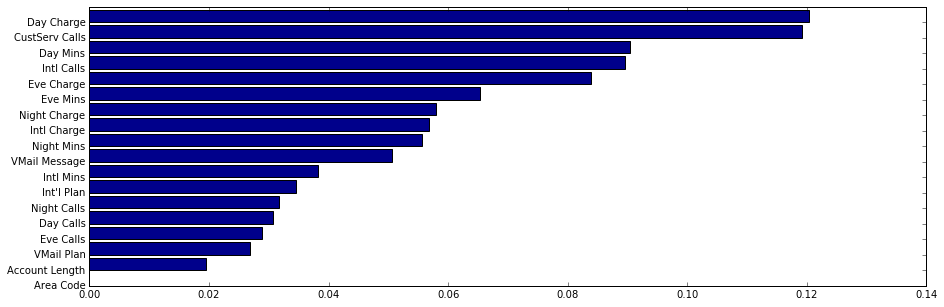

In [29]:
gbc_imp = pd.DataFrame(zip(X.columns, np.transpose(gbc.feature_importances_)))
gbc_imp.sort_values(1, ascending=True, inplace=True)
plt.figure(figsize=(15,5))
plt.barh(range(gbc_imp.shape[0]), gbc_imp[1], color='darkblue')
ticks = plt.yticks(range(gbc_imp.shape[0]), gbc_imp[0])

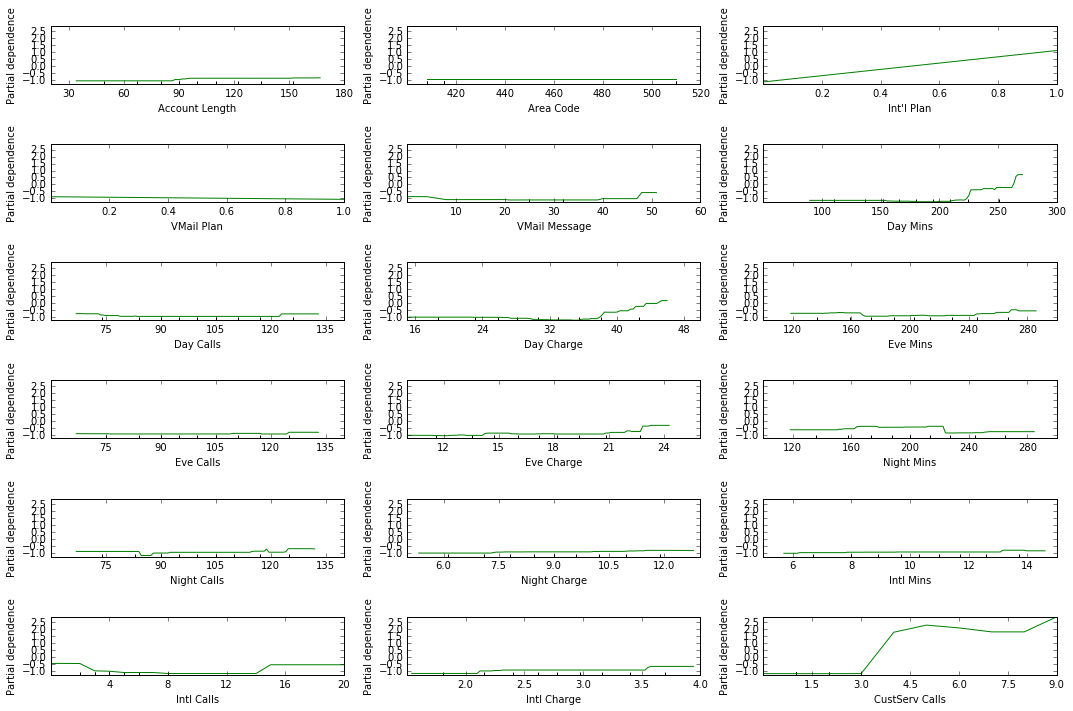

In [30]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
fig, axs = plot_partial_dependence(gbc, X_train, range(X_train.shape[1]),
                                   feature_names=df.columns, figsize=(15, 10))
fig.tight_layout()

In [31]:
X.columns

Index([u'Account Length', u'Area Code', u'Int'l Plan', u'VMail Plan',
       u'VMail Message', u'Day Mins', u'Day Calls', u'Day Charge', u'Eve Mins',
       u'Eve Calls', u'Eve Charge', u'Night Mins', u'Night Calls',
       u'Night Charge', u'Intl Mins', u'Intl Calls', u'Intl Charge',
       u'CustServ Calls'],
      dtype='object')

In [32]:
X_5 = df[['Account Length', 'VMail Plan', 'CustServ Calls', 'Day Charge', 'Eve Mins']]
gbc_5 = GradientBoostingClassifier().fit(X_train, y_train)

accuracy_gbc_5 = cross_val_score(gbc_5, X_5, y, cv=10, scoring='accuracy').mean()
recall_gbc_5 = cross_val_score(gbc_5, X_5, y, cv=10, scoring='recall').mean()
precision_gbc_5 = cross_val_score(gbc_5, X_5, y, cv=10, scoring='precision').mean()

print "*** Gradient boosting five features - Metrics ***"
print "Accuracy = {}".format(accuracy_gbc_5)
print "Recall = {}".format(recall_gbc_5)
print "Precision = {}".format(precision_gbc_5)

*** Gradient boosting five features - Metrics ***
Accuracy = 0.917797737858
Recall = 0.530017006803
Precision = 0.8497200276


In [33]:
from sklearn.grid_search import RandomizedSearchCV

gbc_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
           'max_depth': [4, 6],
           'min_samples_leaf': [3, 5, 9, 17],
           'max_features': [1.0, 0.3, 0.1],
           'n_estimators': [500],
           'random_state': [1]}

gbc_opt = RandomizedSearchCV(gbc, gbc_grid, cv=5, n_jobs=-1, scoring='accuracy')
gbc_opt.fit(X_train, y_train)
gbc_opt.best_params_

{'learning_rate': 0.05,
 'max_depth': 6,
 'max_features': 0.3,
 'min_samples_leaf': 9,
 'n_estimators': 500,
 'random_state': 1}

In [34]:
accuracy_gbc_opt = cross_val_score(gbc, X, y, cv=10, scoring='accuracy').mean()
recall_gbc_opt = cross_val_score(gbc, X, y, cv=10, scoring='recall').mean()
precision_gbc_opt = cross_val_score(gbc, X, y, cv=10, scoring='precision').mean()

print "*** Gradient boosting optimized - Metrics ***"
print "Accuracy = {}".format(accuracy_gbc_opt)
print "Recall = {}".format(recall_gbc_opt)
print "Precision = {}".format(precision_gbc_opt)

*** Gradient boosting optimized - Metrics ***
Accuracy = 0.950499901099
Recall = 0.732908163265
Precision = 0.911313479248


In [35]:
d = {' Model' : ['Logistic regression', 'Optimized random forest', 'Optimized gradient boosting'],
   'Accuracy' : [accuracy_logreg, accuracy_rf_opt, accuracy_gbc_opt],
    'Recall' : [recall_logreg, recall_rf_opt, recall_gbc_opt],
    'Precision' : [precision_logreg, precision_rf_opt, precision_gbc_opt],}
pd.DataFrame(d)

,Model,Accuracy,Precision,Recall
0,Logistic regression,0.859884,0.564063,0.180060
1,Optimized random forest,0.954998,0.923693,0.735009
2,Optimized gradient boosting,0.950500,0.911313,0.732908
